# Упражнения на визуализацию данных

Задачи перенесены из курса [Введение в Data Science и машинное обучение](https://stepik.org/course/4852). Решения не являются эталонными. Главная цель – решить поставленную задачу.

**Задача**. Вам дан датасет с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

In [5]:
import pandas as pd
df = pd.read_csv('files/dataset_209770_6.txt', sep=' ')

<AxesSubplot:xlabel='x', ylabel='y'>

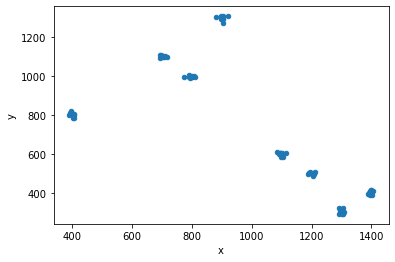

In [12]:
df.plot.scatter(x='x', y='y')

**Задача**. Данные `genome_matrix.csv` представляют геномные расстояния между видами. Постройте тепловую карту, чтобы различия было видно наглядно.

In [15]:
df = pd.read_csv('files/genome_matrix.csv', index_col = 0)

In [16]:
df

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [18]:
import seaborn as sns

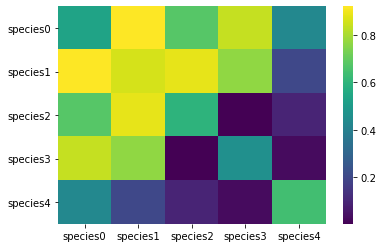

In [20]:
g = sns.heatmap(df, cmap="viridis")

**Задача** о героях из игры Dota 2. Посмотрите на распределение возможных ролей в игре (колонка roles в датасете `dota_hero_stats.csv`)

1. Определите, какая роль среди героев самая распространенная.
2. Постройте гистограмму, отражающую скольким героям сколько ролей приписывается и напишите какое число ролей у большинства героев.

In [31]:
roles = pd.read_csv('files/dota_hero_stats.csv', index_col = 0).roles

In [34]:
roles = roles.apply(eval)

0                           ['Carry', 'Escape', 'Nuker']
1        ['Initiator', 'Durable', 'Disabler', 'Jungler']
2            ['Support', 'Disabler', 'Nuker', 'Durable']
3      ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...
4            ['Support', 'Disabler', 'Nuker', 'Jungler']
                             ...                        
112         ['Carry', 'Escape', 'Disabler', 'Initiator']
113           ['Support', 'Nuker', 'Disabler', 'Escape']
114    ['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc...
115           ['Support', 'Nuker', 'Disabler', 'Escape']
116        ['Carry', 'Initiator', 'Disabler', 'Durable']
Name: roles, Length: 117, dtype: object

In [63]:
list_of_roles = roles.tolist()

In [64]:
from itertools import chain
flat_roles =  chain.from_iterable(list_of_roles)

In [65]:
pd.Series(flat_roles).value_counts()

Disabler     86
Nuker        84
Carry        64
Initiator    53
Escape       47
Durable      47
Support      43
Pusher       29
Jungler      15
dtype: int64

<AxesSubplot:>

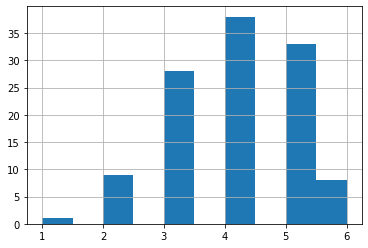

In [76]:
roles.apply(len).hist()

**Задача**. Магистрантка Адель решила изучить какие бывают ирисы (`iris.csv`). Помогите Адель узнать об ирисах больше – постройте их распределения и отметьте правильные утверждени. Распределение должно быть по всем образцам, без разделения на вид.

Варианты ответов:
- Petal width и petal length имеют унимодальное распределение
- Sepal width и sepal length имеют унимодальное распределение
- Petal length имеет наибольший размах значений
- Sepal width и sepal length имеют бимодальное распределение
- Petal width и petal length имеют бимодальное распределение

In [80]:
df = pd.read_csv('files/iris.csv', index_col=0)

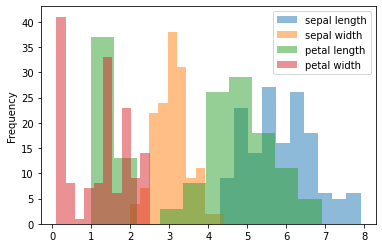

In [96]:
for column in df:
    if column != 'species':
        df[column].plot.hist(label=column,
                             legend=True,
                             alpha = 0.5)